In [1]:
# Configure libraries

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('~/Dissertation/data/joined_final_incl_clusters.csv') # entire data
df_features = pd.read_csv('~/Dissertation/data/data_joined_final_FEATURES_ONLY.csv') # features only

# Create individual target variables
Y_antibiotics = df[['antibiotics']]
Y_class = df[['Class']]
Y_cluster = df[['cluster']]

In [3]:
# drop all records with tolerance_phenotype != an antibiotic
df = df.dropna(subset=['Class'])

In [4]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['Class'].values)
y

array([9, 9, 9, ..., 5, 5, 5])

In [53]:
labels = list(class_le.classes_)

In [55]:
labels_encoded = class_le.transform(labels)

In [52]:
list(class_le.inverse_transform(class_le.transform(list(class_le.classes_))))

['Aminoacids',
 'Aminoglycosides',
 'Cephalosporins',
 'Lincosamides',
 'Macrolides',
 'Mycobacteria',
 'Nitrofurans',
 'Others',
 'Penicillins',
 'Quinolones/Fluoroquinolones',
 'Sulfonamides',
 'Terpenes',
 'Tetracyclines']

In [5]:
features_loc = df.iloc[:,10:696]
features_glob = df.loc[:,['RSA','PRED_DDG']]
features = pd.concat([features_loc,features_glob], axis=1)
features.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F696,F697,F698,F699,F700,F701,F702,F703,RSA,PRED_DDG
0,-0.79,-0.39,0.44,0.48,-0.09,0.0,0.0,0.033,-32.1,65,...,0.001528,-0.22435,-0.13454,-0.01798,-0.021,-0.00242,-0.67,0.14,83.1,-1.059
1,-0.79,-0.39,0.44,0.48,-0.09,0.0,0.0,0.033,-32.1,65,...,0.001528,-0.22435,-0.13454,-0.01798,-0.021,-0.00242,-0.67,0.14,83.1,-1.059
3,-0.79,-0.39,0.44,0.48,-0.09,0.0,0.0,0.033,-32.1,65,...,0.001528,-0.22435,-0.13454,-0.01798,-0.021,-0.00242,-0.67,0.14,83.1,-1.059
4,-0.79,-0.39,0.44,0.48,-0.09,0.0,0.0,0.033,-32.1,65,...,0.001528,-0.22435,-0.13454,-0.01798,-0.021,-0.00242,-0.67,0.14,83.1,-1.059
5,-0.79,-0.39,0.44,0.48,-0.09,0.0,0.0,0.033,-32.1,65,...,0.001528,-0.22435,-0.13454,-0.01798,-0.021,-0.00242,-0.67,0.14,46.0,-1.133


In [6]:
X = features.values
X.shape

(10631, 688)

In [7]:
y.shape

(10631,)

### Train and Test Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Baseline Predictor

In [68]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train_std, y_train)

dummy_pred = dummy.predict(X_test_std)
print('Misclassified samples: %d' %(dummy_pred != y_test).sum())
print('Accuracy: %.2f' %accuracy_score(y_test, dummy_pred))

Misclassified samples: 2922
Accuracy: 0.08


In [69]:
confmat = confusion_matrix(y_true=y_test, y_pred=dummy_pred)
confmat

array([[ 1,  3,  4,  2,  1,  1,  4,  4,  3,  2,  5,  1,  1],
       [47, 47, 47, 35, 32, 43, 38, 39, 38, 37, 25, 35, 37],
       [15, 21, 34, 20, 13, 14, 16, 21, 20, 27, 28, 18, 18],
       [17, 15, 10, 11, 11, 12, 11,  8, 21, 10, 11, 19, 11],
       [26, 24, 26, 23, 23, 27, 28, 21, 16, 21, 34, 17, 21],
       [ 4,  8, 13,  8,  5,  7,  3, 11,  7,  5,  6,  3,  9],
       [ 3,  4,  7,  3,  3,  4,  5,  1,  4,  4,  3,  5,  4],
       [17, 16, 13, 17, 15, 22, 13, 24, 23, 24, 16, 18, 28],
       [27, 26, 27, 13, 21, 23, 23, 23, 24, 29, 19, 25, 29],
       [32, 36, 33, 38, 37, 39, 37, 35, 36, 34, 44, 40, 40],
       [52, 47, 38, 50, 39, 39, 41, 50, 43, 34, 42, 38, 37],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1],
       [14, 15, 14, 17, 15, 21, 16, 14, 14, 10, 13, 10, 16]])

In [70]:
np.savetxt("./Dissertation/data/cm_dummy_random.csv", confmat, delimiter=",")

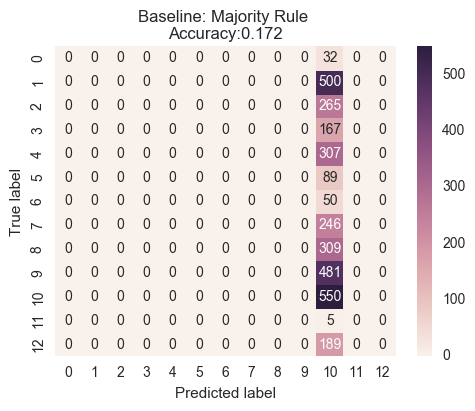

In [67]:
cm = confusion_matrix(y_test, dummy_pred)
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,13)], columns = [i for i in range(0,13)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True, fmt='g')

plt.title('Baseline: Majority Rule \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, dummy_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./Dissertation/data/cm_dummy_majority.png', dpi=300)

### Logistic Regression

In [10]:
%%time

# defining a grid of parameters over which to optimize the lr classifier

params = [{'C': [1, 10, 100]}]
lr = LogisticRegression(n_jobs = -1, penalty='l2')

gs_lr = GridSearchCV(lr, params, cv = 5)
gs_lr = gs_lr.fit(X_train_std, y_train)

print('Best Accuracy: %.3f' %gs_lr.best_score_)
print(gs_lr.best_params_)

Best Accuracy: 0.281
{'C': 10}
CPU times: user 20min 20s, sys: 3.52 s, total: 20min 24s
Wall time: 20min 25s


In [12]:
lr_best = gs_lr.best_estimator_
lr_best.fit(X_train_std, y_train)
lr_pred_best = lr_best.predict(X_test_std)


print('Misclassified samples: %d' %(lr_pred_best != y_test).sum())
print('Accuracy: %.2f' %accuracy_score(y_test, lr_pred_best))

Misclassified samples: 2289
Accuracy: 0.28


In [43]:
confmat = confusion_matrix(y_true=y_test, y_pred=lr_pred_best)
print(confmat)

[[  0   2   0   0   0   0   0  11   0  15   4   0   0]
 [  4 214   6   0   6   8   0  18  10 128 102   0   4]
 [  1  73  12   0   8   0   0   5   2  56 106   0   2]
 [  0  40   1   0   0   0   0   4   1  59  61   0   1]
 [  0  46  21   0  12   0   0   8   1 101 112   0   6]
 [  1  58   3   0   0  15   0   2   0   6   4   0   0]
 [  2  21   0   0   0   0   0   8   1   2  16   0   0]
 [  0  47   2   0   0   0   0  73   1  31  92   0   0]
 [  0  71   4   0   0   0   0   2  16 106 109   0   1]
 [  0  30   8   0   1   0   0   5   2 234 201   0   0]
 [  1  79   6   0   0   0   0  11   9 124 319   0   1]
 [  0   1   0   0   0   0   0   0   0   0   0   4   0]
 [  0  36   3   0   0   0   0  17   0  30 101   0   2]]


In [44]:
np.savetxt("./Dissertation/data/cm_lr.csv", confmat, delimiter=",")

### Random Forest Classifier

In [15]:
%%time

# GridSearch: defining a grid of parameters over which to optimize the rf classifier

params = [{'n_estimators': [100,200], 
           'max_features': ['auto'], 
           'max_depth': [30,50], 
           'oob_score': [True, False]}]
rf = RandomForestClassifier(n_jobs = -1)

gs_rf = GridSearchCV(rf, params, cv =5)
gs_rf = gs_rf.fit(X_train_std, y_train)

print('Best Accuracy: %.3f' %gs_rf.best_score_)
print(gs_rf.best_params_)

Best Accuracy: 0.200
{'oob_score': False, 'max_features': 'auto', 'max_depth': 50, 'n_estimators': 200}
CPU times: user 7min 20s, sys: 10.7 s, total: 7min 31s
Wall time: 2min 24s


In [16]:
rf_best = gs_rf.best_estimator_
rf_best.fit(X_train_std, y_train)
rf_pred_best = rf_best.predict(X_test_std)


print('Misclassified samples: %d' %(rf_pred_best != y_test).sum())
print('Accuracy: %.2f' %accuracy_score(y_test, rf_pred_best))

Misclassified samples: 2587
Accuracy: 0.19


In [41]:
confmat = confusion_matrix(y_true=y_test, y_pred=rf_pred_best)
print(confmat)

[[ 31   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0 148  40   8  19   5  10   4  44 110 107   0   5]
 [  0  50   6   2  24   0   1   2  25  76  73   0   6]
 [  0  44   7   0   5   0   0   1  18  59  31   0   2]
 [  0  37  31   1  19   0   0   6  26  96  72   0  19]
 [  1  44   3   1   1  27   1   1   1   4   5   0   0]
 [  0  24   4   0   0   0   0   1   0   9  12   0   0]
 [  0  26   9   0   9   0   1  85   3  54  54   0   5]
 [  0  73  23   1  17   1   1   0  19 117  54   0   3]
 [  1  64  29   2  35   0   0  12  55 109 162   0  12]
 [  0 110  32   0  34   0  14  12  28 180 127   0  13]
 [  0   1   0   0   0   0   0   0   0   0   0   4   0]
 [  0  29  15   0   8   0   2   1   7  47  52   0  28]]


In [42]:
np.savetxt("./Dissertation/data/cm_rf.csv", confmat, delimiter=",")

#### Assessing feature importance with random forests

In [18]:
feat_labels = features.columns

importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) PRED_DDG                       0.331576
 2) RSA                            0.313226
 3) F331                           0.003788
 4) F587                           0.003506
 5) F5                             0.003387
 6) F443                           0.003046
 7) F593                           0.002771
 8) F464                           0.002756
 9) F364                           0.002436
10) F103                           0.002430
11) F402                           0.002399
12) F12                            0.002157
13) F620                           0.002151
14) F611                           0.002114
15) F273                           0.002090
16) F41                            0.001845
17) F461                           0.001844
18) F340                           0.001751
19) F516                           0.001745
20) F115                           0.001737
21) F681                           0.001677
22) F362                           0.001657
23) F392                        

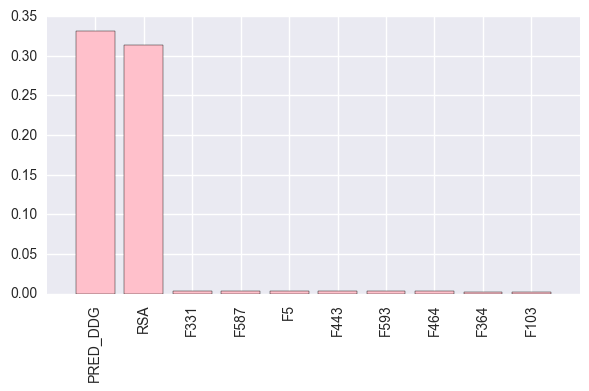

In [19]:
plt.bar(range(10),
       importances[indices[:10]],
       color='pink',
       align='center')
plt.xticks(range(10),
          feat_labels[indices[:10]],
          rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.savefig('./Dissertation/data/variable_importance_rf.png', dpi=300)
plt.show()

#### PRED_DDG and RSA are the most discriminative features in the dataset.

### KNN

In [20]:
%%time

# GridSearch: defining a grid of parameters over which to optimize the knn classifier

params = [{'n_neighbors': [5, 10, 20], 
           'weights': ['uniform', 'distance'],  
           'n_jobs': [-1]}]
clf = KNeighborsClassifier(n_jobs = -1)

gs = GridSearchCV(clf, params, cv =5)
gs = gs.fit(X_train_std, y_train)

print('Best Accuracy: %.3f' %gs.best_score_)
print(gs.best_params_)

Best Accuracy: 0.255
{'weights': 'uniform', 'n_jobs': -1, 'n_neighbors': 20}
CPU times: user 7min 3s, sys: 1.49 s, total: 7min 4s
Wall time: 1min 59s


In [21]:
knn_best = gs.best_estimator_
knn_best.fit(X_train_std, y_train)
knn_pred_best = knn_best.predict(X_test_std)


print('Misclassified samples: %d' %(knn_pred_best != y_test).sum())
print('Accuracy: %.2f' %accuracy_score(y_test, knn_pred_best))

Misclassified samples: 2392
Accuracy: 0.25


In [36]:
confmat = confusion_matrix(y_true=y_test, y_pred=knn_pred_best)
print(confmat)

[[ 24   0   0   0   0   0   1   4   0   2   0   0   1]
 [  4 229  36   0   8   5   3   8  33 113  61   0   0]
 [  1  77  17   0  13   1   0   3  12  88  51   0   2]
 [  0  56   4   0   5   1   0   1  10  68  21   0   1]
 [  1  46  32   0  23   1   0   6  20 116  56   0   6]
 [  1  51   3   0   0  24   0   0   0   4   6   0   0]
 [  3  20   3   0   0   0   2   2   1   9  10   0   0]
 [  2  29   5   0   6   1   0  89   5  65  43   0   1]
 [  1  90  18   0  10   0   0   2  17 121  47   0   3]
 [  3  85  20   0  22   1   0   7  31 185 123   0   4]
 [  1 115  22   0  21   2   3   5  23 184 170   0   4]
 [  0   1   0   0   0   0   0   0   0   0   0   4   0]
 [  0  38  11   0  12   0   0   7   8  58  41   0  14]]


In [39]:
np.savetxt("./Dissertation/data/cm_knn.csv", confmat, delimiter=",")

### Precision and Recall

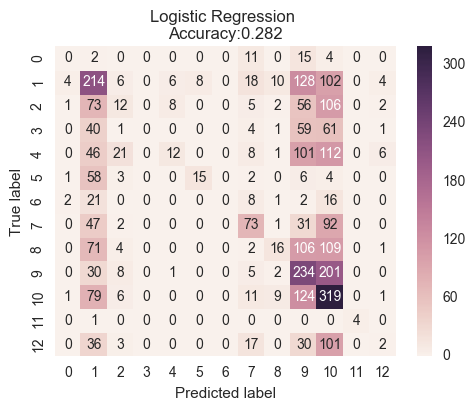

In [46]:
cm = confusion_matrix(y_test, lr_pred_best)
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,13)], columns = [i for i in range(0,13)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True, fmt='g')

plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, lr_pred_best)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./Dissertation/data/cm_multi_lr.png', dpi=300)

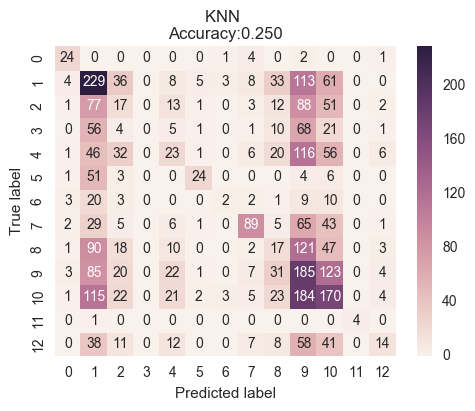

In [34]:
cm = confusion_matrix(y_test, knn_pred_best)
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,13)], columns = [i for i in range(0,13)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True, fmt='g')

plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, knn_pred_best)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./Dissertation/data/cm_multi_knn.png', dpi=300)

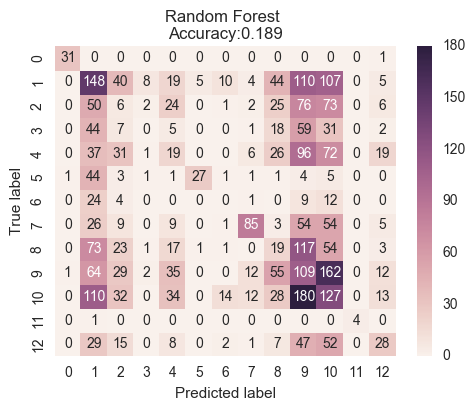

In [35]:
cm = confusion_matrix(y_test, rf_pred_best)
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,13)], columns = [i for i in range(0,13)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True, fmt='g')

plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, rf_pred_best)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./Dissertation/data/cm_multi_rf.png', dpi=300)